In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
x = tf.constant(2.0)
y = tf.constant(4.0)
z = tf.add(x,y)
z

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [3]:
from tensorflow.keras import datasets
(xtrain, ytrain), (xtest, ytest) = datasets.fashion_mnist.load_data()
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

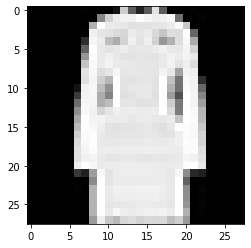

In [5]:
plt.imshow(xtrain[500], cmap='gray')
plt.show()

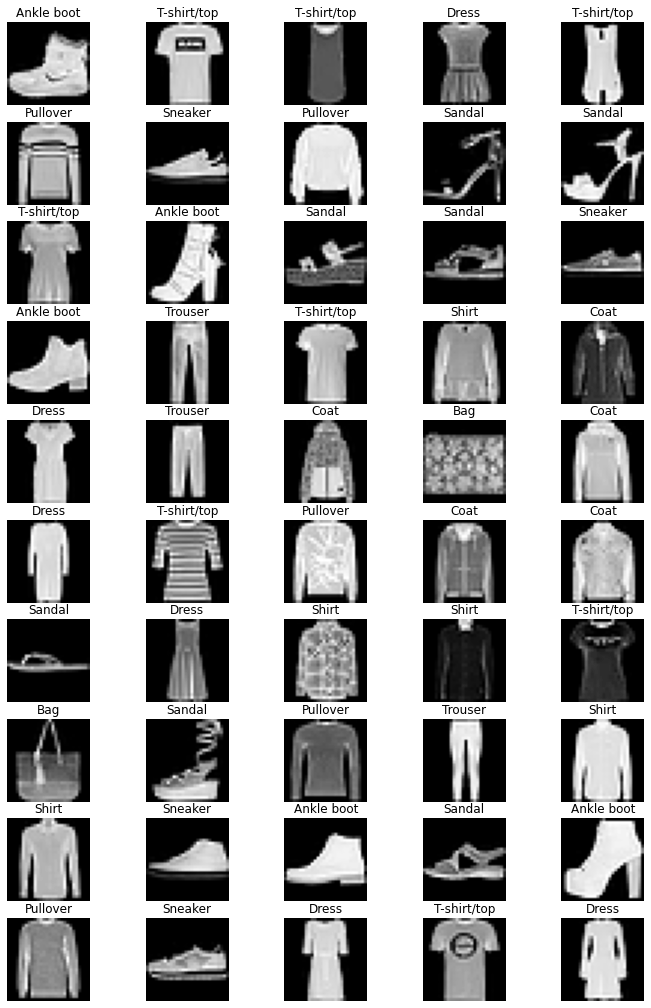

In [6]:
fix, axes = plt.subplots(nrows=10, ncols=5, figsize=(12,18))
axes = axes.flatten()
for i,ax in zip(range(50), axes):
    ax.imshow(xtrain[i], cmap='gray')
    ax.set_title(names[ytrain[i]])
    ax.axis("off")
    
plt.show()

In [7]:
from tensorflow.keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)
ytrain.shape, ytest.shape

((60000, 10), (10000, 10))

In [8]:
import pandas as pd
pd.DataFrame(ytrain, columns=names, dtype='int32')

T-shirt/top  Trouser  Pullover  Dress  Coat  Sandal  Shirt  Sneaker  \
0                0        0         0      0     0       0      0        0   
1                1        0         0      0     0       0      0        0   
2                1        0         0      0     0       0      0        0   
3                0        0         0      1     0       0      0        0   
4                1        0         0      0     0       0      0        0   
...            ...      ...       ...    ...   ...     ...    ...      ...   
59995            0        0         0      0     0       1      0        0   
59996            0        1         0      0     0       0      0        0   
59997            0        0         0      1     0       0      0        0   
59998            1        0         0      0     0       0      0        0   
59999            0        0         0      0     0       1      0        0   

       Bag  Ankle boot  
0        0           1  
1        0           0  
2        0           0  
3        0           0  
4        0           0  
...    ...         ...  
59995    0           0  
59996    0           0  
59997    0           0  
59998    0           0  
59999    0           0  

[60000 rows x 10 columns]

Artificial Neural Network

In [9]:
from tensorflow.keras import models, layers
#initializing an empty neural network by creating an object of sequential model
model = models.Sequential()

#from here onwards we can start adding layers to the network
#as our images are in shape of 28*20 we need to convert them in 1*784. To do this we 
#will add a flatten layer in the neural network
model.add(layers.Flatten(input_shape=(28,28))) #Flatten layer will convert the 28*28 to 1*784

#adding hidden layer with 200 neurons and activation function = relu - Dense Layer
model.add(layers.Dense(200, activation='relu'))

#adding output layer - Dense Layer - in case of dense layer every neuron performs weightage sum and activation function
model.add(layers.Dense(10, activation='softmax')) 
#softmax activation function is used for multiclass classification pbl.
#sigmoid activation function is used for two class classification pbl.

In [10]:
#compile the ANN
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train the ANN
#epochs = number of iterations we want to train the neural network
#batch_size = to divide the 60000 images i.e trainging data into batch
model.fit(xtrain, ytrain, epochs=10, batch_size=1000, verbose=True, validation_split=0.1)
#validation_split =  checking the accuracy of model during the training itself.
#Moment validation accuracy gos higher than actual accuracy training of model should be stopped.

Epoch 1/10
54/54 [==============================] - 1s 28ms/step - loss: 36.9547 - accuracy: 0.6398 - val_loss: 7.6437 - val_accuracy: 0.7665
Epoch 2/10
54/54 [==============================] - 1s 19ms/step - loss: 6.0126 - accuracy: 0.7713 - val_loss: 4.6242 - val_accuracy: 0.7862
Epoch 3/10
54/54 [==============================] - 1s 19ms/step - loss: 4.0050 - accuracy: 0.7916 - val_loss: 3.6887 - val_accuracy: 0.7877
Epoch 4/10
54/54 [==============================] - 1s 18ms/step - loss: 3.0829 - accuracy: 0.8008 - val_loss: 2.9541 - val_accuracy: 0.7948
Epoch 5/10
54/54 [==============================] - 1s 18ms/step - loss: 2.4570 - accuracy: 0.8117 - val_loss: 2.4490 - val_accuracy: 0.8110
Epoch 6/10
54/54 [==============================] - 1s 18ms/step - loss: 2.0332 - accuracy: 0.8155 - val_loss: 2.1767 - val_accuracy: 0.8103
Epoch 7/10
54/54 [==============================] - 1s 18ms/step - loss: 1.6991 - accuracy: 0.8198 - val_loss: 1.9057 - val_accuracy: 0.8082
Epoch 8/10
5

In [14]:
loss, acc = model.evaluate(xtest, ytest)

313/313 [==============================] - 1s 2ms/step - loss: 1.3335 - accuracy: 0.7983


Performance Analysis

In [13]:
ypred = model.predict_classes(xtest)
ypred2 = to_categorical(ypred)
from sklearn import metrics
print(metrics.classification_report(ytest, ypred2))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      1000
           1       0.95      0.94      0.95      1000
           2       0.65      0.71      0.68      1000
           3       0.76      0.82      0.79      1000
           4       0.67      0.60      0.64      1000
           5       0.92      0.91      0.92      1000
           6       0.55      0.48      0.51      1000
           7       0.93      0.85      0.89      1000
           8       0.91      0.94      0.93      1000
           9       0.87      0.96      0.91      1000

   micro avg       0.80      0.80      0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000
 samples avg       0.80      0.80      0.80     10000



In [22]:
from sklearn.metrics import confusion_matrix
import numpy as np
ytest2 = [np.argmax(i) for i in ytest] #reversing the one hot encoding of label for confusion matrix calulation
pd.DataFrame(confusion_matrix(ytest2, ypred), columns=names, index=names)

T-shirt/top  Trouser  Pullover  Dress  Coat  Sandal  Shirt  \
T-shirt/top          771        6        17     73     4       2    107   
Trouser                5      945         6     34     5       0      2   
Pullover              28        6       709     20   124       1     98   
Dress                 48       22        26    817    32       0     41   
Coat                   1        4       190     59   600       0    135   
Sandal                 1        0         0      1     0     911      1   
Shirt                166        6       132     70   121       0    479   
Sneaker                0        0         0      0     0      56      0   
Bag                   14        3        12      6     3       2     13   
Ankle boot             1        0         0      0     0      14      0   

             Sneaker  Bag  Ankle boot  
T-shirt/top        0   19           1  
Trouser            1    2           0  
Pullover           1   13           0  
Dress              0   12           2  
Coat               1    8           2  
Sandal            33    9          44  
Shirt              1   23           2  
Sneaker          854    2          88  
Bag                5  939           3  
Ankle boot        25    2         958

In [23]:
test = pd.DataFrame([ytest2, ypred]).T
test.columns = ['actual','predicted']
error = list(test[test.actual==6][test.predicted==0].index)
len(error)

<ipython-input-23-ed2b00dd7b25>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  error = list(test[test.actual==6][test.predicted==0].index)


166

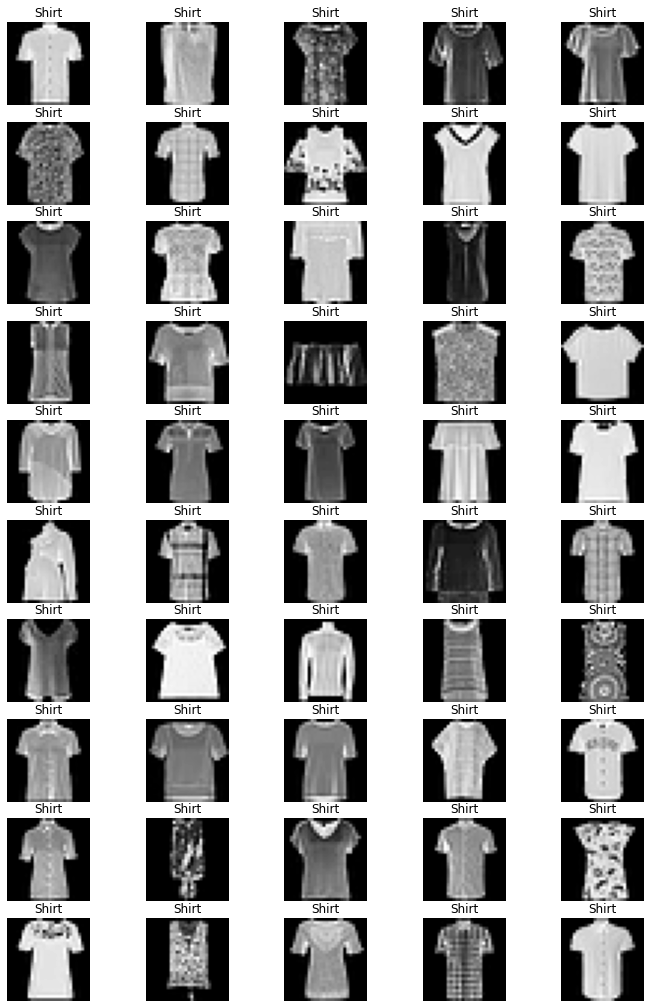

In [26]:
fix, axes = plt.subplots(nrows=10, ncols=5, figsize=(12,18))
axes = axes.flatten()
for i,ax in zip(error[:50], axes):
    ax.imshow(xtest[i], cmap='gray')
    ax.set_title(names[ytest2[i]])
    ax.axis("off")
    
plt.show()